In [5]:
import pandas as pd
from pandas import Series,DataFrame,rolling_mean
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
from pandas_datareader import DataReader

In [8]:
from datetime import datetime

In [9]:
#from __future___ import division 

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMAZ']

In [39]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [40]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'google',start,end)

In [41]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,128.034603,128.920040,127.266865,128.202659,2.968565e+07
std,16.911693,16.917613,16.773156,16.835470,1.360841e+07
min,102.650000,104.450000,102.530000,103.130000,1.147592e+07
25%,112.647500,113.385000,111.737500,112.662500,2.156268e+07
50%,121.040000,121.865000,120.640000,121.755000,2.620322e+07
75%,143.812500,144.540000,143.172500,143.792500,3.356351e+07
max,156.010000,156.650000,155.050000,156.100000,1.123403e+08


In [42]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-07-28 to 2017-07-27
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [43]:
# Creating visualizations for volume tranded and closing stock price for tech companies over a period of one year

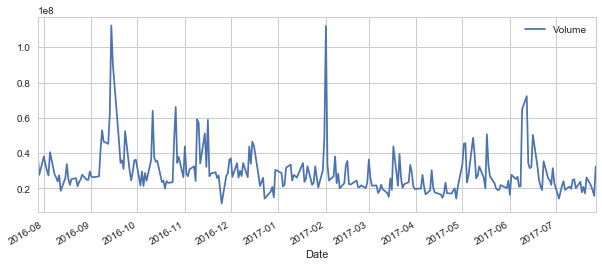

In [44]:


AAPL['Volume'].plot(legend=True, figsize=(10,4))

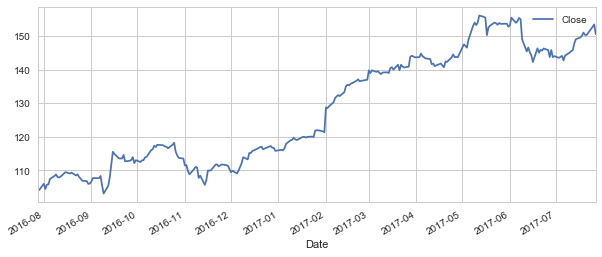

In [45]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

In [46]:
# calculating moving average for 10,20 and 50 days for Apple

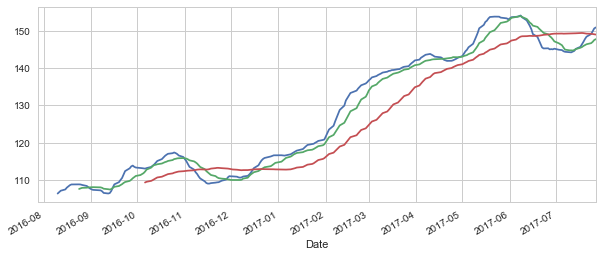

In [47]:
ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA for %s Days" %(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean().plot(subplots=False,figsize=(10,4))

In [48]:
# analysing daily returns and risk of the stock for Apple

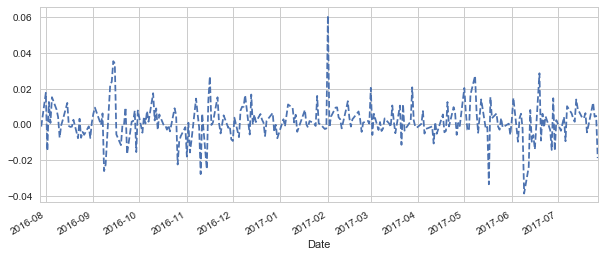

In [49]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),linestyle='--')

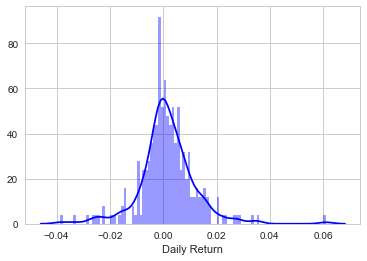

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'blue')

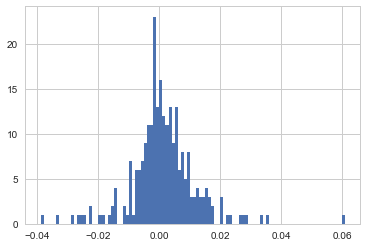

In [23]:
AAPL['Daily Return'].hist(bins=100)

In [50]:
closing_df = DataReader(tech_list,'google',start,end)['Close']

In [51]:
closing_df.head()

,AAPL,AMAZ,GOOG,MSFT
Date,,,,
2016-07-28,104.34,NaN,745.91,56.21
2016-07-29,104.21,NaN,768.79,56.68
2016-08-01,106.05,NaN,772.88,56.58
2016-08-02,104.48,NaN,771.07,56.58
2016-08-03,105.79,NaN,773.18,56.97


In [58]:
tech_rets = closing_df.pct_change()

In [59]:
tech_rets.head()

,AAPL,AMAZ,GOOG,MSFT
Date,,,,
2016-07-28,NaN,NaN,NaN,NaN
2016-07-29,-0.001246,NaN,0.030674,0.008362
2016-08-01,0.017657,NaN,0.005320,-0.001764
2016-08-02,-0.014804,NaN,-0.002342,0.000000
2016-08-03,0.012538,NaN,0.002736,0.006893


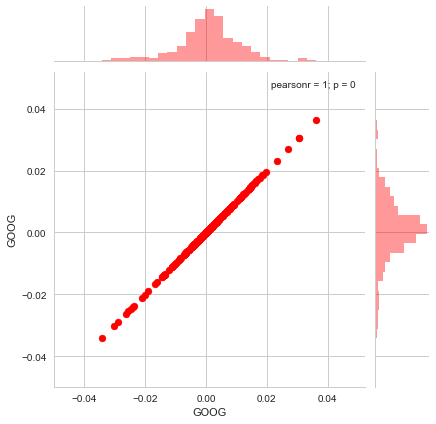

In [60]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='red')

In [61]:
# Comparing relationship between stock of different tech companies.

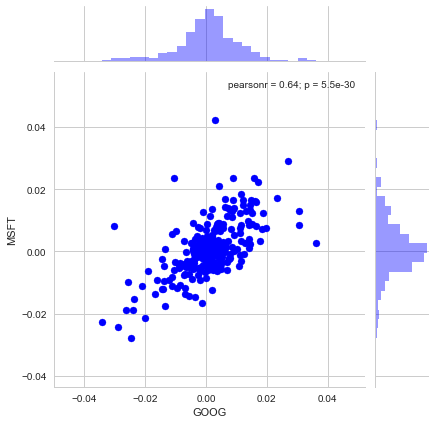

In [62]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue')

In [63]:
#  Using pairplot from Seaborn for comparison analysis for different combination of stock for technology companies. 

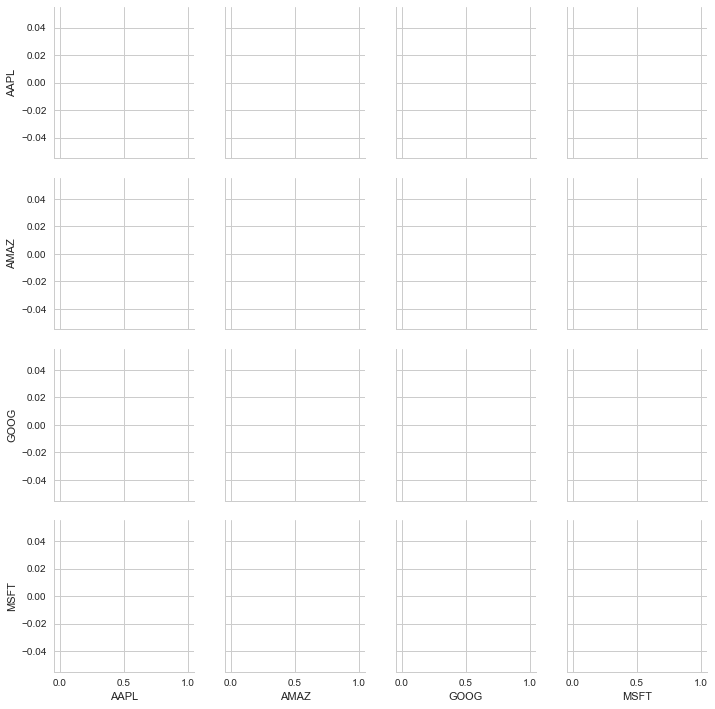

In [64]:
sns.pairplot(tech_rets.dropna(),diag_kind='hist',kind='scatter')

ZeroDivisionError: 0.0 cannot be raised to a negative power

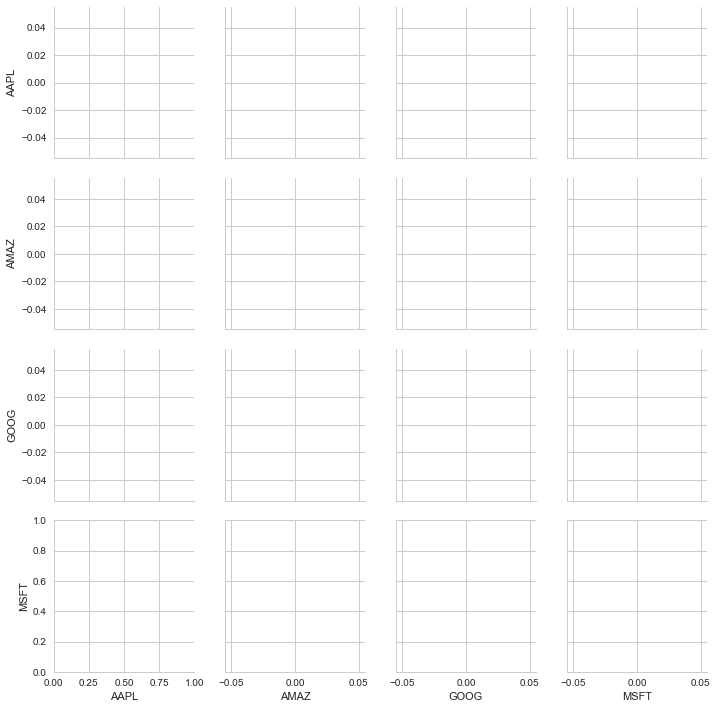

In [65]:
returns_fit = sns.PairGrid(tech_rets.dropna())

returns_fit.map_upper(plt.scatter,color='purple')

returns_fit.map_lower(sns.kdeplot,color='cool_d')

returns_fit.map_diag(plt.hist,color='cool_d')
    

In [ ]:
# analysing closing paices 

In [ ]:
returns_fit = sns.PairGrid(closing_df)

returns_fit.map_upper(plt.scatter,color='purple')

returns_fit.map_lower(sns.kdeplot,color='cool_d')

returns_fit.map_diag(plt.hist,color='cool_d')

In [ ]:
sns.corrplot(tech_rets.dropna(),annot=True)

In [ ]:
sns.corrplot(closing_df,annot=True)

In [ ]:
# Analysing risks of stock

In [ ]:
rets = tech_rets.dropna()

In [ ]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel = ('Expected Return')
plt.ylabel = ('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
